<a href="https://colab.research.google.com/github/Josefh-QM/InteligenceArtificial_NaiveBayes/blob/main/tarea_bayesiana_prestamos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pasos que realizaremos para la solucion del trabajo de Matriz de Confucion

##### Student: Quispe-Morales, Josefh-Jordy - "190241"

1. Análisis Exploratorio de Datos (EDA)
2. Preprocesamiento y Transformación de Datos
3. Entrenamiento del Modelo
4. Evaluación del Modelo
5. Visualización de Resultados

### Ahora vamos a ampliar tu código para incluir estos pasos:

# 1. Análisis Exploratorio de Datos (EDA)
Este paso incluye la visualización de la distribución de las características y las correlaciones entre ellas.

- credit.policy: Indica si el préstamo cumple con las políticas de crédito de la compañía (1 = sí, 0 = no).
- purpose: Describe el propósito del préstamo. En los datos iniciales, vemos propósitos como "debt_consolidation" (consolidación de deudas) y "credit_card" (tarjeta de crédito).
- int.rate: La tasa de interés del préstamo.
- installment: El monto de la cuota mensual del préstamo.
- log.annual.inc: El ingreso anual logarítmico del prestatario.
- dti: La relación deuda-ingreso del prestatario.
- fico: La puntuación FICO del prestatario.
days.with.cr.line: Número de días que el prestatario ha tenido una línea de crédito.
- revol.bal: Saldo revolvente del prestatario.
- revol.util: La utilización del crédito revolvente como un porcentaje del saldo revolvente.
- inq.last.6mths: Número de consultas de crédito en los últimos 6 meses.
- delinq.2yrs: Número de veces que el prestatario ha estado en mora en los últimos 2 años.
- pub.rec: Número de registros públicos negativos.
- not.fully.paid: Indicador de si el prestatario no ha pagado completamente el préstamo (1 = sí, 0 = no).

   credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1         credit_card    0.1426       102.92       11.299732   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333      28854        52.1               0   
1  14.29   707        2760.000000      33623        76.7               0   
2  11.63   682        4710.000000       3511        25.6               1   
3   8.10   712        2699.958333      33667        73.2               1   
4  14.97   667        4066.000000       4740        39.5               0   

   delinq.2yrs  pub.rec  not.fully.paid  
0            0        0   

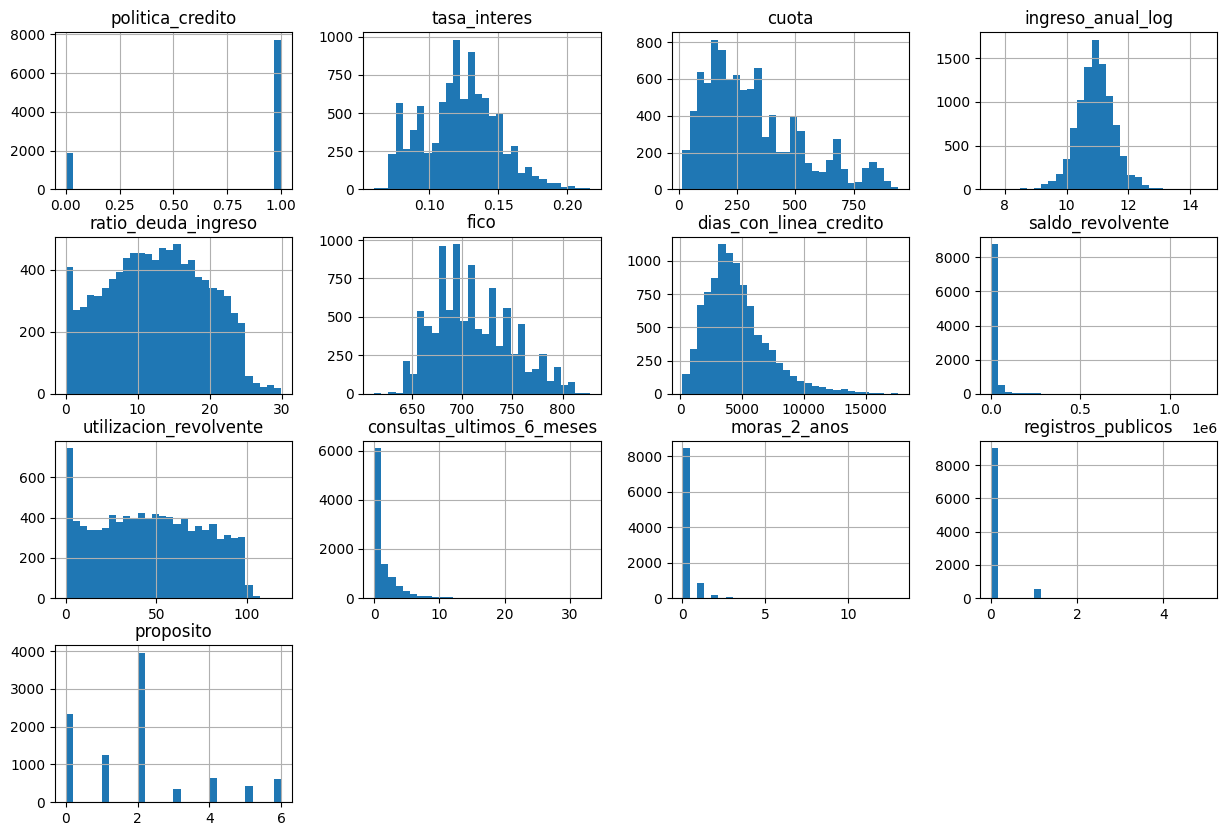

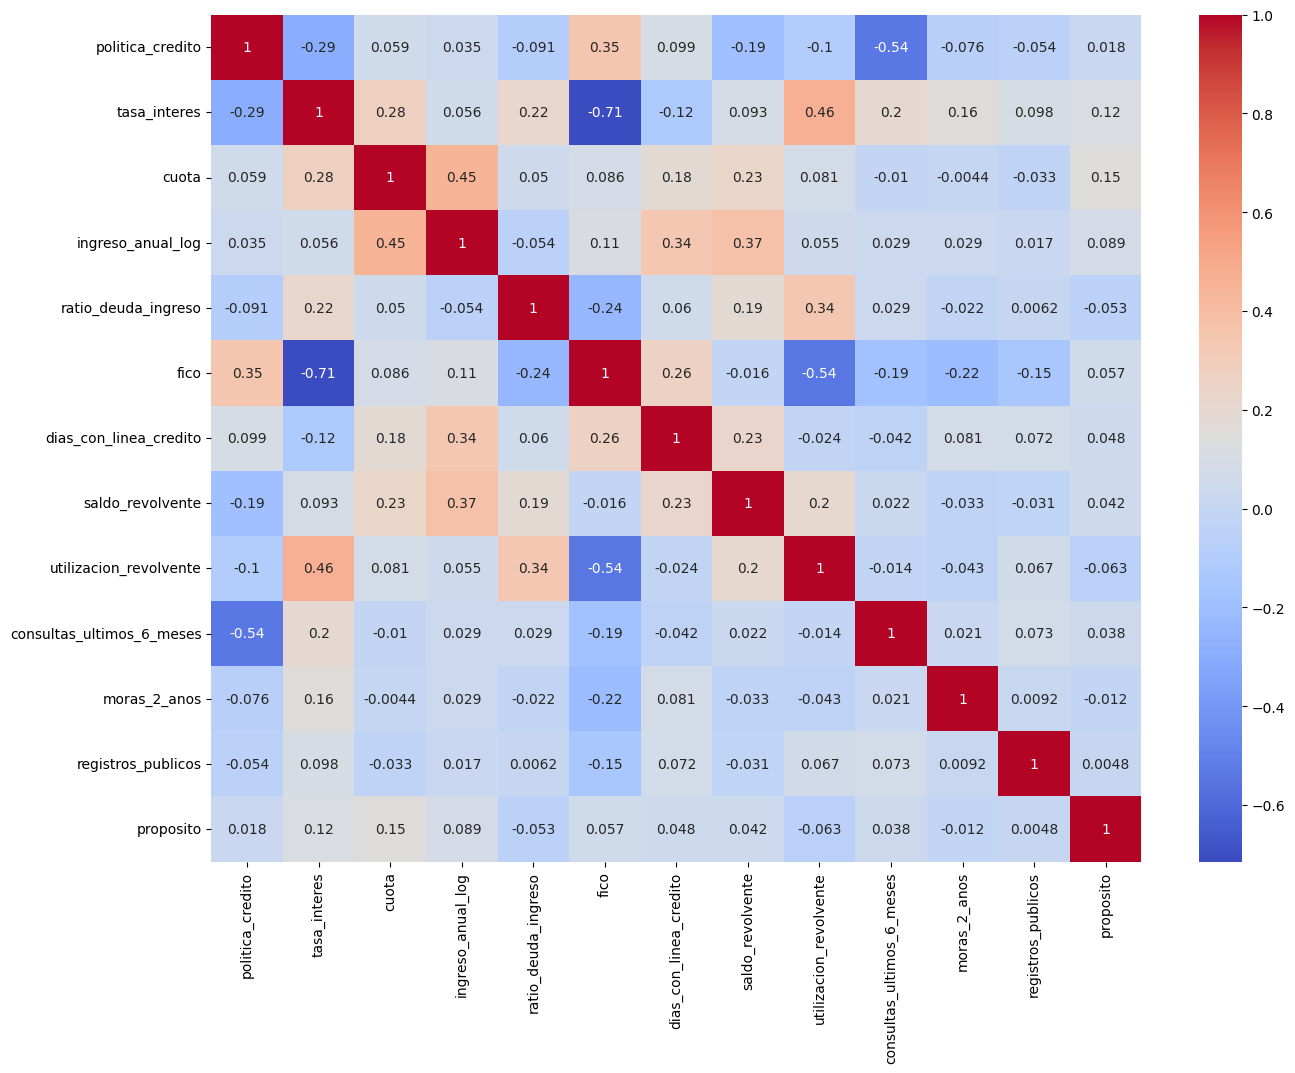

In [ ]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder

# Cargar el archivo CSV
file_path = '/content/loan_data.csv'
data = pd.read_csv(file_path)

# Mostrar las primeras filas del dataframe para explorar los datos
print(data.head())

# Traducir las columnas al español y seleccionar algunas columnas relevantes
data = data.rename(columns={
    'credit.policy': 'politica_credito',
    'purpose': 'proposito',
    'int.rate': 'tasa_interes',
    'installment': 'cuota',
    'log.annual.inc': 'ingreso_anual_log',
    'dti': 'ratio_deuda_ingreso',
    'fico': 'fico',
    'days.with.cr.line': 'dias_con_linea_credito',
    'revol.bal': 'saldo_revolvente',
    'revol.util': 'utilizacion_revolvente',
    'inq.last.6mths': 'consultas_ultimos_6_meses',
    'delinq.2yrs': 'moras_2_anos',
    'pub.rec': 'registros_publicos'
})

# Seleccionar las columnas relevantes
columnas_relevantes = [
    'politica_credito', 'tasa_interes', 'cuota', 'ingreso_anual_log',
    'ratio_deuda_ingreso', 'fico', 'dias_con_linea_credito',
    'saldo_revolvente', 'utilizacion_revolvente',
    'consultas_ultimos_6_meses', 'moras_2_anos', 'registros_publicos', 'proposito'
]

data = data[columnas_relevantes]

# Verificar si hay valores nulos y eliminarlos o imputarlos
print(data.isnull().sum())
data = data.dropna()

# Convertir la columna 'proposito' a etiquetas numéricas
label_encoder = LabelEncoder()
data['proposito'] = label_encoder.fit_transform(data['proposito'])

# Verificar las clases en la columna 'proposito'
print("Clases en 'proposito':", label_encoder.classes_)

# Gráficas de distribución de las características
data.hist(bins=30, figsize=(15,10))
plt.show()

# Matriz de correlación
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()


# 2. Preprocesamiento y Transformación de Datos

#### Características (X):
Son las variables independientes que se utilizarán para predecir la variable objetivo. En este caso, las características incluyen:

1. tasa_interes: Tasa de interés del préstamo.
2. cuota: Cuota del préstamo.
3. ingreso_anual_log: Logaritmo del ingreso anual.
4. ratio_deuda_ingreso: Ratio de deuda sobre ingreso.
5. fico: Puntuación FICO.
6. dias_con_linea_credito: Días con línea de crédito abierta.
7. saldo_revolvente: Saldo revolvente.
8. utilizacion_revolvente: Porcentaje de utilización del saldo revolvente.
9. consultas_ultimos_6_meses: Número de consultas de crédito en los últimos 6 meses.
10. moras_2_anos: Número de moras en los últimos 2 años.
11. registros_publicos: Número de registros públicos de morosidad.

#### Variable Objetivo (y):
Es la variable dependiente que queremos predecir. En este caso, **proposito** se ha convertido a etiquetas numéricas utilizando **LabelEncoder**. Esta variable representa el propósito del préstamo, y puede tomar varios valores, como 'all_other', 'credit_card', 'debt_consolidation', etc.




### **Conjunto de Entrenamiento (Training Set): **
Incluye el 67% de los datos originales. Este conjunto se utiliza para entrenar el modelo de aprendizaje automático. Es importante que el modelo aprenda patrones generales de este conjunto para poder hacer predicciones sobre datos nuevos.

##### X_train: Características del conjunto de entrenamiento.
##### y_train: Variable objetivo del conjunto de entrenamiento.

### **Conjunto de Prueba (Test Set): **
Incluye el 33% restante de los datos originales. Este conjunto se utiliza para evaluar el rendimiento del modelo una vez entrenado. Proporciona una estimación de cómo se desempeñará el modelo en datos no vistos.

##### 1. X_test: Características del conjunto de prueba.
##### 2. y_test: Variable objetivo del conjunto de prueba.
##### 3. test_size=0.33: Indica que el 33% de los datos se asignan al conjunto de prueba y el 67% al conjunto de entrenamiento.
##### 4. random_state=125: Fija la semilla de aleatoriedad para asegurar que la división de los datos sea reproducible. Esto significa que cada vez que se ejecute el código con esta semilla, la división de los datos será la misma.

In [ ]:
# Definir las características (X) y la variable objetivo (y)
X = data.drop(['politica_credito', 'proposito'], axis=1)
y = data['proposito']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=125)


# 3. Entrenamiento del Modelo

En esta línea, se crea una instancia del modelo de Naive Bayes gaussiano (GaussianNB). Naive Bayes es un algoritmo de clasificación supervisada basado en la probabilidad bayesiana. El supuesto principal del algoritmo es que las características son independientes entre sí, lo cual es una simplificación fuerte pero que puede funcionar bien en muchos casos.




Esta línea entrena el modelo de Naive Bayes utilizando el conjunto de entrenamiento **(X_train y y_train)**. El método fit ajusta el modelo a los datos de entrenamiento, calculando las probabilidades necesarias para realizar las predicciones. En concreto:

- Estimación de Parámetros:

El modelo calcula la media y la varianza de cada característica para cada clase en el conjunto de entrenamiento. Estas estadísticas se utilizan para calcular las probabilidades condicionales de cada clase dada una observación.


- Cálculo de Probabilidades:

Durante el ajuste, el modelo estima las probabilidades de que una observación pertenezca a cada clase, basándose en la función de densidad de probabilidad gaussiana (normal).

**Importancia del Entrenamiento**

- **Aprendizaje del Modelo:**

Durante el entrenamiento, el modelo aprende a reconocer los patrones en los datos que le permiten hacer predicciones sobre nuevas observaciones. Este es un paso crucial en el proceso de construcción de un modelo de machine learning.

- **Generalización:**


 El objetivo es que el modelo no solo funcione bien con los datos de entrenamiento, sino que también generalice bien a nuevos datos no vistos (conjunto de prueba). Esto se consigue entrenando el modelo con un conjunto representativo y suficientemente grande de datos.

- **Simplicidad y Rapidez:**


 Los modelos de Naive Bayes son simples y rápidos de entrenar, lo que los hace adecuados para conjuntos de datos grandes y problemas donde la rapidez es importante.

In [ ]:
# Crear y entrenar el modelo de Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)

#print(model)

GaussianNB()


# 4. Evaluación del Modelo

### Interpretación de los Resultados

#### Exactitud (Accuracy):

`accuracy = accuracy_score(y_test, y_pred)`

Calcula la proporción de observaciones correctamente clasificadas entre todas las observaciones en el conjunto de prueba. La fórmula es:

\[
\text{Exactitud} = \frac{\text{Número de predicciones correctas}}{\text{Número total de observaciones}}
\]

**Resultado**: `Exactitud: 0.42708003796267` indica que el 42.7% de las observaciones en el conjunto de prueba fueron clasificadas correctamente por el modelo.

#### Puntuación F1 (F1 Score):

`f1 = f1_score(y_test, y_pred, average='weighted')`

La puntuación F1 es la media armónica de la precisión y la sensibilidad, proporcionando una medida equilibrada del rendimiento del modelo. La fórmula para una clase es:

\[

\text{Puntuación F1} = 2 \times \frac{\text{Precisión} \times \text{Sensibilidad}}{\text{Precisión} + \text{Sensibilidad}}

\]

La versión ponderada considera la contribución de cada clase según su número de observaciones.



**Resultado**: `Puntuación F1: 0.3511217806825895` indica que, en promedio, el equilibrio entre la precisión y la sensibilidad del modelo es de aproximadamente 35.1%.

### Importancia de estas Métricas

- **Exactitud**: Es una métrica sencilla y fácil de interpretar, pero puede ser engañosa si las clases están desbalanceadas (es decir, si algunas clases son mucho más frecuentes que otras).

- **Puntuación F1**: Es útil cuando hay un desequilibrio en las clases, ya que toma en cuenta tanto la precisión como la sensibilidad. Una puntuación F1 baja puede indicar que el modelo está fallando en identificar correctamente una o más clases.


### Interpretación de los Resultados

#### Exactitud (Accuracy):

```python
accuracy = accuracy_score(y_test, y_pred)
```

## Interpretación de los Resultados

- Exactitud del 42.7%: Significa que el modelo clasifica correctamente menos de la mitad de las observaciones en el conjunto de prueba. Esto puede ser una señal de que el modelo no está capturando bien los patrones en los datos o que las características no son suficientemente predictivas para la variable objetivo.

- Puntuación F1 del 35.1%: Indica que el modelo tiene un rendimiento deficiente en términos de equilibrio entre precisión y sensibilidad. Este bajo puntaje sugiere que el modelo no solo está cometiendo errores en la clasificación, sino que estos errores no son equilibrados entre las diferentes clases.

In [ ]:
# Hacer predicciones con el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print("Exactitud:", accuracy)
print("Puntuación F1:", f1)


Exactitud: 0.42708003796267
Puntuación F1: 0.3511217806825895


# 5. Visualización de Resultados

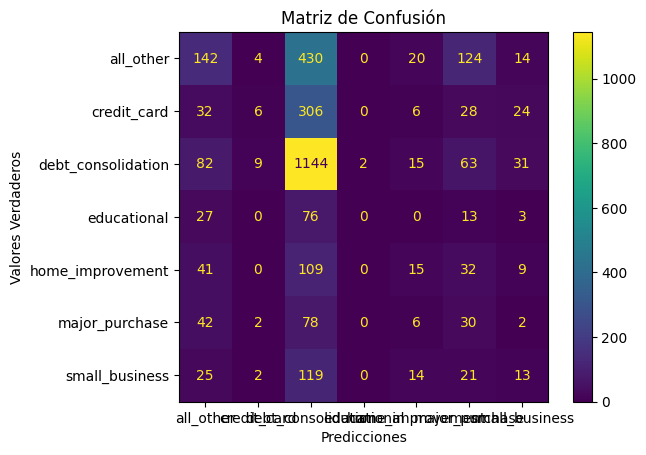

In [ ]:
# Importar librerías necesarias
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Calcular la matriz de confusión
labels = np.unique(y)
cm = confusion_matrix(y_test, y_pred, labels=labels)

# Mostrar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot()
plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.show()


# Interpretación de Resultados:

Exactitud (Accuracy): Mide la proporción de predicciones correctas del total de predicciones.
Puntuación F1 (F1 Score): Considera tanto la precisión como la sensibilidad, proporcionando una medida equilibrada del rendimiento del modelo.
Matriz de Confusión: Proporciona una visualización de las predicciones verdaderas y falsas para cada clase, permitiendo identificar las clases donde el modelo tiene más dificultades.


   credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1         credit_card    0.1426       102.92       11.299732   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333      28854        52.1               0   
1  14.29   707        2760.000000      33623        76.7               0   
2  11.63   682        4710.000000       3511        25.6               1   
3   8.10   712        2699.958333      33667        73.2               1   
4  14.97   667        4066.000000       4740        39.5               0   

   delinq.2yrs  pub.rec  not.fully.paid  
0            0        0   

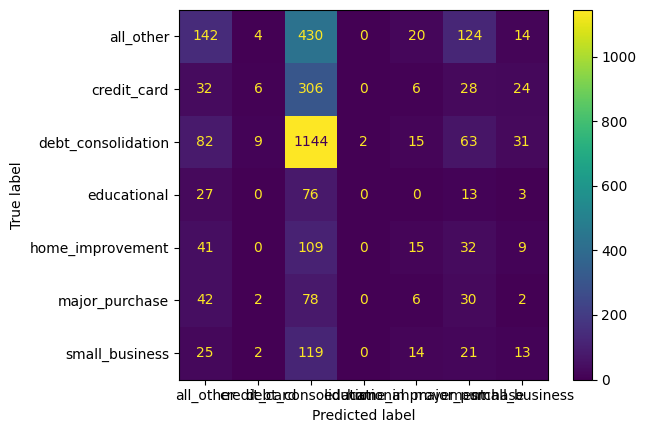

In [ ]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
# subir el archivo CSV
#from google.colab import files
#uploaded = files.upload()

# Cargar el archivo CSV desde la carpeta raíz de Google Colab
file_path = '/content/loan_data.csv'
data = pd.read_csv(file_path)

# Mostrar las primeras filas del dataframe para explorar los datos
print(data.head())

# Traducir las columnas al español y seleccionar algunas columnas relevantes
data = data.rename(columns={
    'credit.policy': 'politica_credito',
    'purpose': 'proposito',
    'int.rate': 'tasa_interes',
    'installment': 'cuota',
    'log.annual.inc': 'ingreso_anual_log',
    'dti': 'ratio_deuda_ingreso',
    'fico': 'fico',
    'days.with.cr.line': 'dias_con_linea_credito',
    'revol.bal': 'saldo_revolvente',
    'revol.util': 'utilizacion_revolvente',
    'inq.last.6mths': 'consultas_ultimos_6_meses',
    'delinq.2yrs': 'moras_2_anos',
    'pub.rec': 'registros_publicos'
})

# Seleccionar las columnas relevantes
columnas_relevantes = [
    'politica_credito', 'tasa_interes', 'cuota', 'ingreso_anual_log',
    'ratio_deuda_ingreso', 'fico', 'dias_con_linea_credito',
    'saldo_revolvente', 'utilizacion_revolvente',
    'consultas_ultimos_6_meses', 'moras_2_anos', 'registros_publicos', 'proposito'
]

data = data[columnas_relevantes]

# Verificar si hay valores nulos y eliminarlos o imputarlos
print(data.isnull().sum())
data = data.dropna()

# Convertir la columna 'proposito' a etiquetas numéricas
label_encoder = LabelEncoder()
data['proposito'] = label_encoder.fit_transform(data['proposito'])

# Verificar las clases en la columna 'proposito'
print("Clases en 'proposito':", label_encoder.classes_)

# Definir las características (X) y la variable objetivo (y)
X = data.drop(['politica_credito', 'proposito'], axis=1)
y = data['proposito']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=125)

# Crear y entrenar el modelo de Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)

# Hacer predicciones con el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print("Exactitud:", accuracy)
print("Puntuación F1:", f1)

# Mostrar la matriz de confusión con al menos 5 etiquetas
labels = np.unique(y)
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot()
plt.show()
